<a href="https://colab.research.google.com/github/BeBrave-BeHumble/Machine_Learning/blob/main/ADP/Chapter_6_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 8. 앙상블 (Ensemble)

## 1.개념

앙상블은 단일 결정 트리의 단점을 극복하기 위해 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 방법이다. 즉, 여러 개의 예측모형들을 만든 후 예측모형들을 조합하여 하나의 최종 예측 모형을 만드는 것이다. 편향, 잡음 및 분산으로 인한 오류를 막고 과적합을 방지하기 위해 사용된다. 대표적인 기법으로는 붓스트랩, 배깅, 부스팅, 랜덤포레스트가 있다.

## 2.붓스트랩

붓스트랩은 랜덤 샘플링의 일종으로 가설 검증을 하거나 통계 계산을 하기 전에 단순임의복원추출법을 적용하여 여러 개의 동일한 크기의 표본 자료를 획득하는 방법이다. 주어진 데이터를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로부터 중복을 허용한 무작위 반복 추출을 하여 복수의 자료를 획득하고 각각에서 통계량을 계산한다.


## 3.배깅

### (1)개념

주어진 자료를 모집단으로 간주하여 주어진 자료에서 여러 개의 붓스트랩 자료를 생성하고 각각의 붓스트랩 자료에서 예측 모형을 만든 후 결합하여 최종 예측모형을 만드는 방식이다. 통계분류와 회귀분석에서 사용하는 머신러닝 알고리즘의 안정성과 정확도를 향상시키기 위해 고안된 일종의 항상블 학습법의 알고리즘이다. 분산을 줄이고 정확도를 개선하여 모델의 안정성을 크게 높여 과적합을 방지한다.

배깅을 이용한 ML은 붓스트래핑-> 모델링-> 보팅 순으로 진행된다.

## (2)보팅

1. 개념: 여러 개의 모형으로부터 산출된 결과 중 다수결에 의해 최종 결과를 산정하는 과정이다.

2. 진행방법: 최적 의사결정 트리 구축에서 가장 어려운 가지치기를 진행하지 않고 약한 학습자인 트리를 최대로 성장시킨 후 보팅을 진행한다.

### (3)배깅의 특징

1. 주어진 자료보타 분산이 적은 앙상블 모델을 얻는 데 중점을 둔다.
2. 각 붓스트랩에 대해 붓스트래핑 및 모델링 과정이 병렬적으로 수행된다.

### (4) Out of Bag

1. 개념: 배깅에서 붓스트래핑을 수행하면 평균적으로 각 예측기에 훈련데이터의 63%정도만 샘플링 된다. 이때 선택되지 않은 나머지 37%를 Out of Bag 샘플이라고 한다. 단, 예측기마다 남겨진 37%의 데이터는 서로 다르다

2. oob_score: 선택되지 않은 데이터로 모델의 성능평가를 수행하는 데 사용할 수 있다. 따라서 검증세트나 교차검증이 따로 필요하지 않다.



### (5)scikit-learn의 ensemble.BaggingClassifier

위스콘신 유방암 진단 데이터셋 사용하여 종양 예측

설명변수: area_mean, texture_mean 타깃변수: diagnosis

In [2]:
import pandas as pd
breast = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv")
breast.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


'M은 악성을 의미하며 전체데이터의 37%를 차지함.\nB는 양성을 의미하며 전체 데이터의 63%'

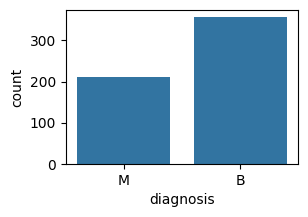

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (3,2))
sns.countplot(x = 'diagnosis', data = breast) # 타깃데이터 시각화
'''M은 악성을 의미하며 전체데이터의 37%를 차지함.
B는 양성을 의미하며 전체 데이터의 63%'''

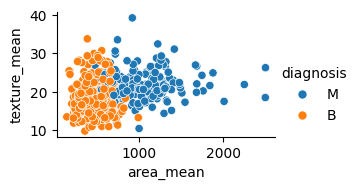

In [4]:
# 설명변수와 종속변수 관계 시각화
sns.relplot(x = 'area_mean', y = 'texture_mean', hue = 'diagnosis', data = breast, height = 2, aspect = 1.5)
plt.show()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
# 범주형 종속변수 이산형으로 변환
breast["diagnosis"] = np.where(breast['diagnosis'] == 'M', 1, 0) # 악성이면 1 아니면 0
# 변수 지정
features = ["area_mean", "area_worst"]
X = breast[features]
y = breast["diagnosis"]
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 56)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [6]:
# BaggingClassifier 사용해 분류기 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator = DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print(f'ACC: {clf.score(x_test, y_test):.3f}')

ACC: 0.924


In [7]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pred),
             index = ['True[0]', 'True[1]'],
             columns = ['Pred[0]', 'Pred[1]'])

,Pred[0],Pred[1]
True[0],101,6
True[1],7,57


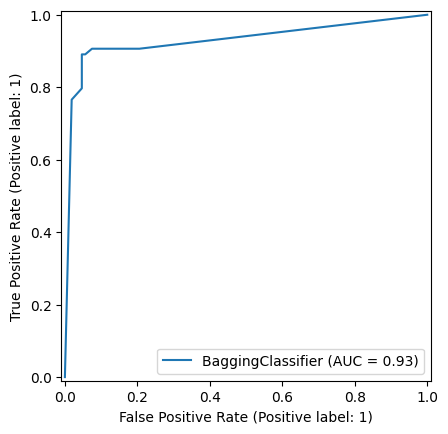

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, x_test, y_test); plt.show()

In [9]:
# oob_score 사용해 >모델 평가<
# obb_score를 사용할 경우 밸리데이션셋이나 교차검증을 하지 않아도 된다는 장점이 있다
clf_oob = BaggingClassifier(estimator = DecisionTreeClassifier(), oob_score = True)
oob = clf_oob.fit(X, y).oob_score_
print(oob) # 0.93 -> train test 나눈 결과랑 비슷함

0.9226713532513181


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


### (6)scikit-learn의 ensemble.BaggingRegressor

캐글 자동차 데이터셋

설명변수: 연속형 변수만 사용, 타깃변수: price

In [10]:
car = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv")
car.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [11]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X = car_num[features]
y = car_num['price']
print(X.shape, y.shape)

(205, 13) (205,)


In [12]:
# 배깅 이용해 예측모델 생성하고 oob_socre 기능으로 모델 평가
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(estimator = DecisionTreeRegressor(), oob_score = True)
reg = reg.fit(X, y)
print('정확도:', reg.oob_score_) # 정확도가 약 87%임을 알 수 있음

정확도: 0.8903337358210113


## 4.부스팅

### (1)개념

부스팅은 예측력이 약한 모형들을 결합해 강한 예측모형을 만드는 방법이다. 붓스트랩을 병렬로 수행하여 각 모델을 독립적으로 구축하는 배깅과 달라, 부스팅은 순차방식으로 학습을 진행한다.

훈련 단계에서 알고리즘은 데이터 샘플에 가중치를 할당하므로 분류결과가 좋지 않은 데이터는 높은 가중치를, 좋은 데이터는 낮은 가중치를 할당받는다. 높은 가중치를 받은 데이터 샘플은 다음 붓스트래핑에서 추출될 확률이 높아진다. 직전 단계에서 예측력이 약했던 부분을 개선해나가는 개념이다. 따라서 배깅에 비해 모델의 장점을 최적화하고 train set에 대해 오류가 적은 결합모델을 생성할 수 있다는 장점이 있다. 단, train에 과적합할 위험이 있다.

### (2)scikit-learn의 ensemble.AdaBoostClassifier

위스콘신 유방암 진단 데이터셋 사용하여 종양 예측

설명변수: area_mean, texture_mean 타깃변수: diagnosis

In [13]:
breast = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv")
# 범주형 종속변수 이산형으로 변환
breast["diagnosis"] = np.where(breast['diagnosis'] == 'M', 1, 0) # 악성이면 1 아니면 0
# 변수 지정
features = ["area_mean", "area_worst"]
X = breast[features]
y = breast["diagnosis"]
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 56)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [14]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(estimator = None)
pred = clf.fit(x_train, y_train).predict(x_test)
print(f'정확도: {clf.score(x_test, y_test):.3f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


정확도: 0.918


In [15]:
# 부스팅 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(cm)
print()
print(f'정확도: {acc*100:.3f}%')
print(f'정밀도: {prc*100:.3f}%')
print(f'재현율: {rcll*100:.3f}%')
print(f'F1: {f1*100:.3f}%')

[[101   6]
 [  8  56]]

정확도: 91.813%
정밀도: 90.323%
재현율: 87.500%
F1: 88.889%


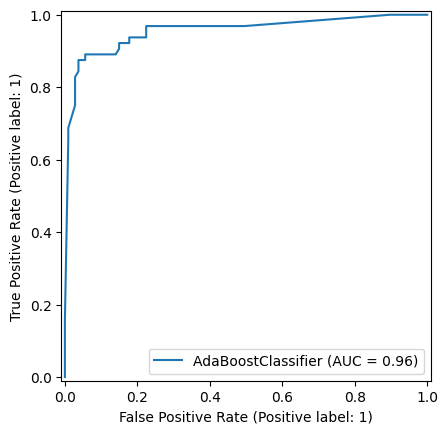

In [16]:
RocCurveDisplay.from_estimator(clf, x_test, y_test); plt.show()

In [33]:
# 변수 중요도 -> 분석 결과 area_mean 변수의 중요도가 높은 것을 알 수 있음
importances = clf.feature_importances_
colname = pd.DataFrame(features)
feature_imp = pd.concat([colname, pd.DataFrame(importances)], axis = 1)
feature_imp.columns = ['feature name', 'importances']
print(feature_imp)

  feature name  importances
0    area_mean         0.46
1   area_worst         0.54


<BarContainer object of 2 artists>

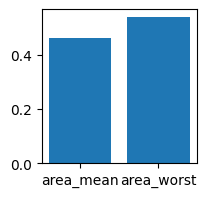

In [37]:
# importance 시각화
plt.figure(figsize = (2, 2))
xtick_label_position = list(range(len(features)))
plt.xticks(xtick_label_position, features)
plt.bar([x for x in range(len(importances))], importances)

### (3)scikit-learn의 ensemble.AdaBoostRegressor

캐글 자동차 데이터셋

설명변수: 연속형 변수만 사용, 타깃변수: price

In [38]:
car = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv")
car_num = car.select_dtypes(['number']) # 연속형 변수 추출
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price'])) # 설명변수 설정
X = car_num[features] # 피처
y = car_num['price'] # 타깃

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [45]:
# AdaBoostRegressor fitting
from sklearn.ensemble import AdaBoostRegressor
boost = AdaBoostRegressor(estimator = None)
pred = boost.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = boost.score(x_test, y_test)
print(f'MSE: {mse:.3f}'); print(f'MAE: {mae:.3f}'); print(f'RMSE: {rmse:.3f}'); print(f'ACC: {acc*100:.3f}%')

MSE: 4794212.844
MAE: 1784.362
RMSE: 2189.569
ACC: 93.527%


In [47]:
# 변수 중요도
imp = boost.feature_importances_
colname = pd.DataFrame(features)
feature_imp = pd.concat([colname, pd.DataFrame(imp)], axis = 1)
feature_imp.columns = ['feature name', 'importances']
print(feature_imp) # enginesized가 타깃변수 예측에 가장 많은 영향을 줌

        feature name  importances
0          boreratio     0.014821
1          carheight     0.022886
2          carlength     0.046870
3           carwidth     0.083192
4            citympg     0.031556
5   compressionratio     0.010176
6         curbweight     0.093075
7         enginesize     0.584382
8         highwaympg     0.010180
9         horsepower     0.076902
10           peakrpm     0.012276
11            stroke     0.000549
12         wheelbase     0.013135


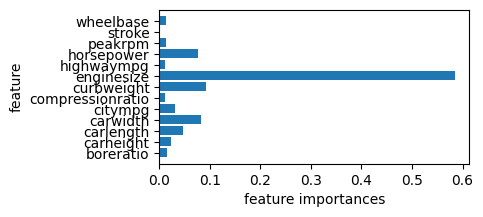

In [53]:
# 시각화
n_features = x_train.shape[1]
column_name = features
plt.figure(figsize = (4, 2))
plt.barh(range(n_features), imp, align = 'center')
plt.yticks(np.arange(n_features), column_name)
plt.xlabel("feature importances") ;   plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

#### +변수중요도 속성 없을 때


BaggingRegressor는 feature_importances_ 속성을 가지고 있지 않음.
따라서, 피처 중요도를 얻고자 한다면, 사용된 개별 베이스 모델(예: DecisionTreeRegressor)에서 피처 중요도를 추출하고, 여러 모델의 중요도를 평균내어 계산해야 함.

In [ ]:
# 각 개별 트리의 feature_importances_를 가져와 평균냄
importances = np.mean([tree.feature_importances_ for tree in reg.estimators_], axis = 0)
colname = pd.DataFrame(features)
pd.concat([colname, pd.DataFrame(importances)], axis = 1) # 보기 좋게 변수명과 합치기

## 5.랜덤포레스트

### (1)개념

랜덤포레스트는 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형결합하여 최종 학습기를 만드는 방법이다. 수천 개의  변수를 **변수 제거 없이 모델링하므로 정확도 측면에서 좋은 성과를 보이는 기법 중 하나이다.**

이론적 설명이나 최종 결과에 대한 해석이 어렵다는 단점이 있지만, 입력변수가 많은 경우 배깅 및 부스팅과 비슷하거나 더 좋은 예측력을 보인다.

### (2)scikit-learn의 ensemble.RandomForestClassfier

유방암 데이터 사용

In [9]:
breast = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv")

breast["diagnosis"] = np.where(breast['diagnosis'] == 'M', 1, 0) # 악성이면 1 아니면 0
features = ["area_mean", "area_worst"] # 설명변수 지정
X = breast[features] # 피처
y = breast["diagnosis"] # 타깃

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 56)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 5)
pred = rf.fit(x_train, y_train).predict(x_test)
print(f'정확도: {rf.score(x_test, y_test): .3f}')

정확도:  0.924


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(cm)
print(f'정확도: {acc*100:.3f}%')
print(f'정밀도: {prc*100:.3f}%')
print(f'재현율: {rcll*100:.3f}%')
print(f'F1: {f1*100:.3f}%')

[[101   6]
 [  7  57]]
정확도: 92.398%
정밀도: 90.476%
재현율: 89.062%
F1: 89.764%


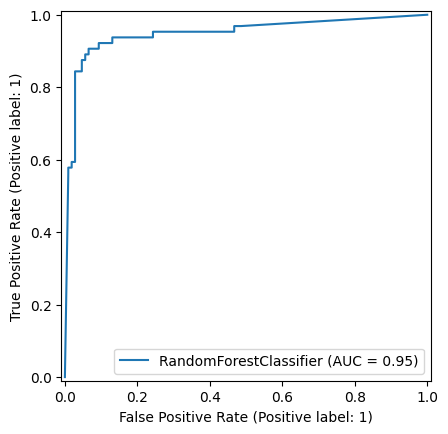

In [15]:
RocCurveDisplay.from_estimator(rf, x_test, y_test); plt.show()

   feature name  importances
0     area_mean     0.463543
1  texture_mean     0.536457


<BarContainer object of 2 artists>

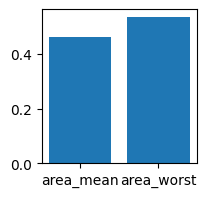

In [20]:
imp = rf.feature_importances_
colname = pd.DataFrame(['area_mean', 'texture_mean'])
feature_imp = pd.concat([colname, pd.DataFrame(imp)], axis = 1)
feature_imp.columns = ['feature name', 'importances']
print(feature_imp) # texture_mean 변수가 더 중요한 것을 알 수 있음
# 시각화
xtick_label_position = list(range(len(features))) # features 아까 위에서 정의함
plt.figure(figsize = (2, 2))
plt.xticks(xtick_label_position, features)
plt.bar([x for x in range(len(imp))], imp)

In [17]:
features

['area_mean', 'area_worst']

### (3)scikit-learn의 ensemble.RandomForestRegressor

In [22]:
car = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv")
car_num = car.select_dtypes(['number']) # 연속형 변수 추출
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price'])) # 설명변수 설정
X = car_num[features] # 피처
y = car_num['price'] # 타깃

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56)

In [25]:
# RF fitting
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
pred = rf.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = rf.score(x_test, y_test)
print(f'MSE: {mse:.3f}'); print(f'MAE: {mae:.3f}'); print(f'RMSE: {rmse:.3f}'); print(f'ACC: {acc*100:.3f}%')

MSE: 3047021.047
MAE: 1334.741
RMSE: 1745.572
ACC: 95.886%


        feature name  importances
0          boreratio     0.004175
1          carheight     0.010723
2          carlength     0.014166
3           carwidth     0.058315
4            citympg     0.017441
5   compressionratio     0.009908
6         curbweight     0.247804
7         enginesize     0.577215
8         highwaympg     0.019378
9         horsepower     0.019498
10           peakrpm     0.007908
11            stroke     0.005823
12         wheelbase     0.007646


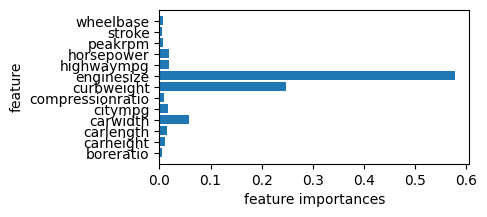

In [29]:
imp = rf.feature_importances_
colname = pd.DataFrame(features)
feature_imp = pd.concat([colname, pd.DataFrame(imp)], axis = 1)
feature_imp.columns = ['feature name', 'importances']
print(feature_imp) # enginesize 변수가 가장 중요한 것을 알 수 있음
# 시각화
n_features = x_train.shape[1]
column_name = features
plt.figure(figsize = (4, 2))
plt.barh(range(n_features), imp, align = 'center')
plt.yticks(np.arange(n_features), column_name)
plt.xlabel("feature importances") ;   plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()